# Capstone Project - The Battle of Neighborhoods in Taichung City

In [99]:
import pandas as pd
import numpy as np
import json
import requests
import os
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install -c conda-forge bs4 --yes # uncomment this line if you haven't completed the Foursquare API lab
from bs4 import BeautifulSoup

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import seaborn as sns
from matplotlib import pyplot as plt

print('Libraries imported.')

Libraries imported.


In [100]:
# if the environment didn't with lxml package
# pip install lxml
print('Pip install completed.')

Pip install completed.


# Part 1: Data preparation
## Create dataframe from List of headers and rows of Taichung Neighbourhood data

In [101]:
# preprocess data and web crawler code(on other python file)
# step1: Process function define
# step2: Get Taichung_info.csv from web site(wiki)
# step3: Get Taichung_English_Name.csv
# step4: Get Taiwan_Geospatial_Coordinates.json from web site(wiki)
# step5: Combine Taichung_info.csv/Taichung_English_Name.csv/Taiwan_Geospatial_Coordinates.json to a dataframe(Taichung_Merge_Info.csv)

## Step1: Process function define

Define CSV Process Class

In [102]:
class CSVprocess(object):
    
    def __init__(self):
        #self.address = "C:\\Users\\Brian\\Desktop\\ibm_coursera\\Coursera_Capstone\week4\\"
        self.address = "C:\\Users\\brian\\Desktop\\Coursera_Capstone\\week4\\"
    
    def load_from_csv(self, filename):
        df = pd.read_csv(self.address + filename, encoding='UTF-8')
        return df
    
    def write_to_csv(self, filename, dictionary):
        colume_list = []
        
        for key, value in dictionary.items():
            colume_list.append(key)
        
        df = pd.DataFrame(dictionary, columns=colume_list)
        df.to_csv(self.address + filename, index=False, encoding="utf_8_sig")

Define Json Process Class

In [103]:
class JsonProcess(object):
    
    def __init__(self):
        #self.address = "C:\\Users\\Brian\\Desktop\\ibm_coursera\\Coursera_Capstone\week4\\"
        self.address = "C:\\Users\\brian\\Desktop\\Coursera_Capstone\\week4\\"
    
    def load_from_json(self, filename):
        json_file = open(self.address + filename, "r", encoding="utf-8")
        j = json_file.read()
        json_file.close()
        dict_data = json.loads(j)
        return dict_data
    
    def dictionary_to_json(self, dictionary):
        json_data = json.dumps(dictionary)
        return json_data

Define Get Data from Web Class

In [104]:
class GetDateFromWeb(object):
    
    def get_taichung_info(self):
        response = requests.get('https://zh.wikipedia.org/wiki/臺中市#人口')
        content = response.content
        df = pd.read_html(content, encoding='utf-8')
        taichung_info_df = df[11]
        
        return taichung_info_df

Define DataFrame Process Class

In [105]:
class DataProcess(object):
    
    def __init__(self):
        pass
    
    def merge_dataframe(self, source_df, target_df, field_name):
        df = pd.merge(source_df, target_df, on=field_name)
        return df
    
    def drop_rename_dataframe(self, df, row_drop_list, colume_drop_list, rename_list):
        df = df.drop(row_drop_list)
        df = df.drop(columns=colume_drop_list)
        for item in rename_list:
            for key, value in item.items():    
                df = df.rename(columns={key: value})
                
        return df

In [106]:
csvProcess = CSVprocess()
jsonProcess = JsonProcess()
dataProcess = DataProcess()
getDataFromWeb = GetDateFromWeb()

## Step2: Get Taichung_info.csv from web site(wiki)

Use pandas to transform the data in the table on the Wikipedia page into a dataframe

In [107]:
row_drop_list = [29]
colume_drop_list = ["下轄里數", "下轄鄰數", "人口消長", "地理分區"]
rename_list = [{"區名": "Chinese Name"},{"面積（km²）": "Area"},{"人口數": "Population"},{"人口密度（人/km²）": "Density"},{"郵遞區號": "Postal Code"}]

df = get_taichung_info()
df = dataProcess.drop_rename_dataframe(df, row_drop_list, colume_drop_list, rename_list)

Write the Taichung dataframe to Taichung_info_temp.csv

In [108]:
csvProcess.write_to_csv("Taichung_info.csv", df.to_dict())

Load Taichung Dataframe from csv file

In [109]:
taichung_df = csvProcess.load_from_csv("Taichung_info.csv")
print(taichung_df.shape)
taichung_df.head(30)

(29, 5)


,Chinese Name,Area,Population,Density,Postal Code
0,中區,0.8803,18173,20644,400.0
1,東區,9.2855,75769,8160,401.0
2,南區,6.8101,126585,18588,402.0
3,西區,5.7042,114618,20094,403.0
4,北區,6.9376,146676,21142,404.0
5,北屯區,62.7034,286208,4564,406.0
6,西屯區,39.8467,230978,5797,407.0
7,南屯區,31.2578,175439,5613,408.0
8,太平區,120.7473,194835,1614,411.0
9,大里區,28.8759,212957,7375,412.0


## Step3: Get Taichung_English_Name.csv

In [110]:
taichung_english_name_df = csvProcess.load_from_csv("Taichung_English_Name.csv")
print(taichung_english_name_df.shape)
taichung_english_name_df.head(30)

(29, 2)


,Chinese Name,Name
0,南屯區,Nantun District
1,西屯區,Xitun District
2,北屯區,Beitun District
3,西區,West District
4,北區,North District
5,霧峰區,Wufeng District
6,豐原區,Fengyuan District
7,龍井區,Longjing District
8,潭子區,Tanzi District
9,新社區,Xinshe District


## Step4: Get Taiwan_Geospatial_Coordinates.json from web site

Load Taiwan Geospatial Coordinates from json file

In [111]:
taiwan_geo_dict = jsonProcess.load_from_json("Taiwan_Geospatial_Coordinates.json")
taiwan_geo_dict

{'dataroot': {'@_noNamespaceSchemaLocation': '1050429_行政區經緯度(toPost).xsd',
  '@_generated': '2016-08-12T12:06:09',
  '_x0031_050429_行政區經緯度_x0028_toPost_x0029_': [{'行政區名': '臺北市中正區',
    '_x0033_碼郵遞區號': '100',
    '中心點經度': '121.5198839',
    '中心點緯度': '25.03240487',
    'TGOS_URL': 'http://tgos.nat.gov.tw/tgos/Web/MetaData/TGOS_MetaData_View.aspx?MID=9C715A5CD330360D355AE105F908B29E&amp;SHOW_BACK_BUTTON=false'},
   {'行政區名': '臺北市大同區',
    '_x0033_碼郵遞區號': '103',
    '中心點經度': '121.5130417',
    '中心點緯度': '25.06342433',
    'TGOS_URL': 'http://tgos.nat.gov.tw/tgos/Web/MetaData/TGOS_MetaData_View.aspx?MID=9C715A5CD330360D355AE105F908B29E&amp;SHOW_BACK_BUTTON=false'},
   {'行政區名': '臺北市中山區',
    '_x0033_碼郵遞區號': '104',
    '中心點經度': '121.5381597',
    '中心點緯度': '25.06969917',
    'TGOS_URL': 'http://tgos.nat.gov.tw/tgos/Web/MetaData/TGOS_MetaData_View.aspx?MID=9C715A5CD330360D355AE105F908B29E&amp;SHOW_BACK_BUTTON=false'},
   {'行政區名': '臺北市松山區',
    '_x0033_碼郵遞區號': '105',
    '中心點經度': '121.5575876',
  

## Step5: Combine Taichung_info.csv/Taichung_English_Name.csv/Taiwan_Geospatial_Coordinates.json to a dataframe(Taichung_Merge_Info.csv)

Merge Chinese Name and English Name on Taiwan location

In [112]:
temp_df = dataProcess.merge_dataframe(taichung_df, taichung_english_name_df, "Chinese Name")
temp_df.head()

,Chinese Name,Area,Population,Density,Postal Code,Name
0,中區,0.8803,18173,20644,400.0,Central District
1,東區,9.2855,75769,8160,401.0,East District
2,南區,6.8101,126585,18588,402.0,South District
3,西區,5.7042,114618,20094,403.0,West District
4,北區,6.9376,146676,21142,404.0,North District


Merge the Latitude and Longitude with taichung info

In [113]:
temp_df = pd.concat([temp_df, pd.DataFrame(columns=['Latitude', 'Longitude'])], sort=False)
temp_df.head()

,Chinese Name,Area,Population,Density,Postal Code,Name,Latitude,Longitude
0,中區,0.8803,18173.0,20644.0,400.0,Central District,NaN,NaN
1,東區,9.2855,75769.0,8160.0,401.0,East District,NaN,NaN
2,南區,6.8101,126585.0,18588.0,402.0,South District,NaN,NaN
3,西區,5.7042,114618.0,20094.0,403.0,West District,NaN,NaN
4,北區,6.9376,146676.0,21142.0,404.0,North District,NaN,NaN


Merge Taichung Info and Taiwan Geospatial Coordinates

In [114]:
for i, item in enumerate(temp_df["Postal Code"]):
    for info in taiwan_geo_dict["dataroot"]["_x0031_050429_行政區經緯度_x0028_toPost_x0029_"]:
        postal_code = int(info["_x0033_碼郵遞區號"])
        latitude = float(info["中心點緯度"])
        longitude = float(info["中心點經度"])
        if int(item) == int(postal_code):
            temp_df["Latitude"][i] = latitude
            temp_df["Longitude"][i] = longitude
temp_df

<ipython-input-114-209a7f49b36e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["Latitude"][i] = latitude
<ipython-input-114-209a7f49b36e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["Longitude"][i] = longitude


,Chinese Name,Area,Population,Density,Postal Code,Name,Latitude,Longitude
0,中區,0.8803,18173.0,20644.0,400.0,Central District,24.1417,120.681
1,東區,9.2855,75769.0,8160.0,401.0,East District,24.1373,120.697
2,南區,6.8101,126585.0,18588.0,402.0,South District,24.1211,120.665
3,西區,5.7042,114618.0,20094.0,403.0,West District,24.1439,120.665
4,北區,6.9376,146676.0,21142.0,404.0,North District,24.1586,120.681
5,北屯區,62.7034,286208.0,4564.0,406.0,Beitun District,24.184,120.736
6,西屯區,39.8467,230978.0,5797.0,407.0,Xitun District,24.1831,120.627
7,南屯區,31.2578,175439.0,5613.0,408.0,Nantun District,24.1417,120.618
8,太平區,120.7473,194835.0,1614.0,411.0,Taiping District,24.1148,120.773
9,大里區,28.8759,212957.0,7375.0,412.0,Dali District,24.0958,120.693


Write to csv file

In [115]:
temp_df.to_dict()
csvProcess.write_to_csv("Taichung_Merge_Info.csv", temp_df.to_dict())

# Part 2: Use Foursquare and folium Map to explore Data

In [116]:
# Step1: Get Merged dataframe from Taichung_Merge_Info.csv
# Step2: Explore Neighborhoods in Taichung(By folium Map)
# Step3: Explore Neighborhoods in Taichung(By Foursquare API)
# Step4: Visualization the Taichung City dataframe infomation

## Step1: Get merged dataframe from Taichung_Merge_Info.csv

In [117]:
df = pd.read_csv("C:\\Users\\brian\\Desktop\\Coursera_Capstone\\week4\\Taichung_Merge_Info.csv")
print(df.shape)
df.head()

(29, 8)


,Chinese Name,Area,Population,Density,Postal Code,Name,Latitude,Longitude
0,中區,0.8803,18173.0,20644.0,400.0,Central District,24.141686,120.680598
1,東區,9.2855,75769.0,8160.0,401.0,East District,24.137332,120.697086
2,南區,6.8101,126585.0,18588.0,402.0,South District,24.121141,120.664618
3,西區,5.7042,114618.0,20094.0,403.0,West District,24.143911,120.664758
4,北區,6.9376,146676.0,21142.0,404.0,North District,24.158640,120.680952


## Step2: Explore the neighborhoods in Taichung(By folium Map)

#### Use geopy library to get the latitude and longitude values of Taichung.

In [118]:
# Taichung include all dist
address = 'Taichung'

geolocator = Nominatim(user_agent="Taichung_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Taichung City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Taichung City are 24.163162, 120.6478282.


Create a map of Taichung with neighborhoods superimposed on top.

In [119]:
# create map of Taaichung using latitude and longitude values
map_taichung = folium.Map(location=[latitude, longitude], zoom_start=10)


# add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Name']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_taichung)  

    
map_taichung

## Step3: Explore the neighborhoods in Taichung(By Foursquare API)

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them

Define Foursquare Credentials and Version

In [120]:
CLIENT_ID = 'THFFFFOKOAKQGANVA4TA2JHTMFJPWO2NVNSVRJYN5PCYN2UJ' # your Foursquare ID
CLIENT_SECRET = 'R3XFLVT4XZBEH14TEFREEPR4JNKI1TH0PJ0O0CCJHWHIZ52Y' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: THFFFFOKOAKQGANVA4TA2JHTMFJPWO2NVNSVRJYN5PCYN2UJ
CLIENT_SECRET:R3XFLVT4XZBEH14TEFREEPR4JNKI1TH0PJ0O0CCJHWHIZ52Y


### Example for the Central District in Taichung City

explore the first neighborhood in our dataframe.

Get and test the first neighborhood's name.

In [121]:
df.loc[0, 'Name']
print(df.loc[0, 'Name'])

neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'Name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Central District
Latitude and longitude values of Central District are 24.14168566, 120.680598.


Now, let's get the top 100 venues that are in Marble Hill within a radius of 1000 meters.

First, let's create the GET request URL. Name your URL url.

In [122]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=THFFFFOKOAKQGANVA4TA2JHTMFJPWO2NVNSVRJYN5PCYN2UJ&client_secret=R3XFLVT4XZBEH14TEFREEPR4JNKI1TH0PJ0O0CCJHWHIZ52Y&v=20180605&ll=24.14168566,120.680598&radius=1000&limit=100'

Send the GET request and examine the resutls

In [123]:
results = requests.get(url).json()
#results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fc38b299d01581b7fe90dd4'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Taichung',
  'headerFullLocation': 'Taichung',
  'headerLocationGranularity': 'city',
  'totalResults': 62,
  'suggestedBounds': {'ne': {'lat': 24.15068566900001,
    'lng': 120.6904422105805},
   'sw': {'lat': 24.132685650999992, 'lng': 120.6707537894195}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '51ff47aaccda2191e0c4efa8',
       'name': '台中市第四信用合作社',
       'location': {'address': '中區中山路72號',
        'lat': 24.138986985649026,
        'lng': 120.68195649010902,
        'labeledLatLngs': [{'label': 'display',
          'lat': 24.138986985649026,
          'lng':

From the Foursquare lab in the previous module, we know that all the information is in the items key. Before we proceed, let's borrow the get_category_type function from the Foursquare lab.

In [124]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [125]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-125-561c05f0fdd1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,台中市第四信用合作社,Ice Cream Shop,24.138987,120.681956
1,台中市公有第二零售市場,Market,24.142094,120.679246
2,范記金之園草袋飯,Chinese Restaurant,24.141308,120.682276
3,洪瑞珍正宗招牌三明治,Sandwich Place,24.140132,120.680565
4,阿斗伯冷凍芋頭,Dessert Shop,24.145315,120.677813


And how many venues were returned by Foursquare?

In [126]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

62 venues were returned by Foursquare.


In [127]:
print('{} unique categories in Central District'.format(nearby_venues['categories'].value_counts().shape[0]))

37 unique categories in Central District


In [128]:
print(nearby_venues['categories'].value_counts()[0:100])

Hotel                            6
Convenience Store                5
Chinese Restaurant               5
Coffee Shop                      3
Dessert Shop                     3
Snack Place                      2
Japanese Restaurant              2
Asian Restaurant                 2
Shopping Mall                    2
Movie Theater                    2
Tea Room                         2
Ice Cream Shop                   2
Bakery                           2
Sushi Restaurant                 1
Shopping Plaza                   1
Noodle House                     1
Train Station                    1
Bubble Tea Shop                  1
Indie Movie Theater              1
Diner                            1
Concert Hall                     1
Multiplex                        1
Breakfast Spot                   1
Street Food Gathering            1
Market                           1
Café                             1
Dim Sum Restaurant               1
Outlet Store                     1
Night Market        

### Process all the District in Taichung City

Let's create a function to repeat the same process to all the neighborhoods in Taichung

In [129]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe called taichung_venues.

In [130]:
taichung_venues = getNearbyVenues(names=df['Name'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Central District
East District
South District
West District
North District
Beitun District
Xitun District
Nantun District
Taiping District
Dali District
Wufeng District
Wuri District
Fengyuan District
Houli District
Shigang District
Dongshi District
Heping District
Xinshe District
Tanzi District
Daya District
Shengang District
Dadu District
Shalu District
Longjing District
Wuqi District
Qingshui District
Dajia District
Waipu District
Da'an District


Check the size of the resulting dataframe

In [131]:
print(taichung_venues.shape)
taichung_venues.head(50)
#print ('{} unique categories in Taichung'.format(taichung_venues['Venue Category'].value_counts().shape[0]))
#print (taichung_venues['Venue Category'].value_counts()[0:50])

(288, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central District,24.141686,120.680598,台中市第四信用合作社,24.138987,120.681956,Ice Cream Shop
1,Central District,24.141686,120.680598,台中市公有第二零售市場,24.142094,120.679246,Market
2,Central District,24.141686,120.680598,范記金之園草袋飯,24.141308,120.682276,Chinese Restaurant
3,Central District,24.141686,120.680598,洪瑞珍正宗招牌三明治,24.140132,120.680565,Sandwich Place
4,Central District,24.141686,120.680598,阿斗伯冷凍芋頭,24.145315,120.677813,Dessert Shop
5,Central District,24.141686,120.680598,瑪露蓮,24.141186,120.681042,Dessert Shop
6,Central District,24.141686,120.680598,宮原眼科 摘星樓,24.138062,120.683413,Vegetarian / Vegan Restaurant
7,Central District,24.141686,120.680598,Miyahara (宮原眼科),24.138036,120.683466,Ice Cream Shop
8,Central District,24.141686,120.680598,沁園春,24.139649,120.682850,Chinese Restaurant
9,Central District,24.141686,120.680598,Taichung Park (台中公園),24.142873,120.684247,Park


## Step4: Visualization the Taichung City dataframe infomation

### Rank of Venue_Category in Taichung City

In [132]:
taichung_venues_category_top10 = taichung_venues['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
taichung_venues_category_top10=taichung_venues_category_top10.reset_index()
#Taichung Venues Top10
taichung_venues_category_top10.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
taichung_venues_category_top10

,Venue Category,Frequency
0,Chinese Restaurant,23
1,Hotel,17
2,Café,16
3,Coffee Shop,13
4,Convenience Store,13
5,Dessert Shop,12
6,Tea Room,11
7,Asian Restaurant,10
8,Japanese Restaurant,9
9,Taiwanese Restaurant,9


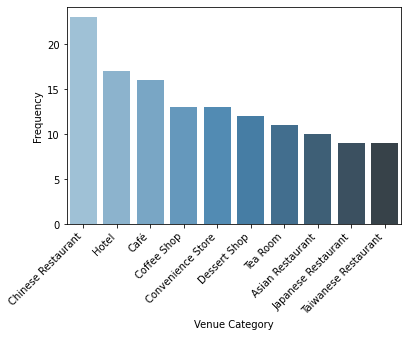

In [133]:
s = sns.barplot(x="Venue Category", y="Frequency", data=taichung_venues_category_top10, palette="Blues_d")
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### Number of every type of restaurant in Taichung City

In [134]:
# Create a Fataframe when only with Restaurants 
taichung_venues_only_restaurant = taichung_venues[taichung_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
taichung_venues_only_restaurant.index = np.arange(1, len(taichung_venues_only_restaurant )+1)

In [135]:
print(taichung_venues_only_restaurant['Venue Category'].value_counts())

Chinese Restaurant               23
Asian Restaurant                 10
Taiwanese Restaurant              9
Japanese Restaurant               9
Fast Food Restaurant              7
Italian Restaurant                4
Dumpling Restaurant               3
Restaurant                        3
Vegetarian / Vegan Restaurant     2
Hotpot Restaurant                 2
American Restaurant               2
Seafood Restaurant                2
Dim Sum Restaurant                1
Hakka Restaurant                  1
Ramen Restaurant                  1
Vietnamese Restaurant             1
Sushi Restaurant                  1
Cantonese Restaurant              1
Szechuan Restaurant               1
Yunnan Restaurant                 1
French Restaurant                 1
Hong Kong Restaurant              1
Name: Venue Category, dtype: int64


In [136]:
print('There are {} uniques categories.'.format(len(taichung_venues_only_restaurant['Venue Category'].unique())))

There are 22 uniques categories.


In [137]:
# create a dataframe of top 10 categories
dist_venues_top10 = taichung_venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
dist_venues_top10=dist_venues_top10.reset_index()

#Taichung Venues Top10
dist_venues_top10.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
dist_venues_top10

,Venue Category,Frequency
0,Chinese Restaurant,23
1,Asian Restaurant,10
2,Taiwanese Restaurant,9
3,Japanese Restaurant,9
4,Fast Food Restaurant,7
5,Italian Restaurant,4
6,Dumpling Restaurant,3
7,Restaurant,3
8,Vegetarian / Vegan Restaurant,2
9,Hotpot Restaurant,2


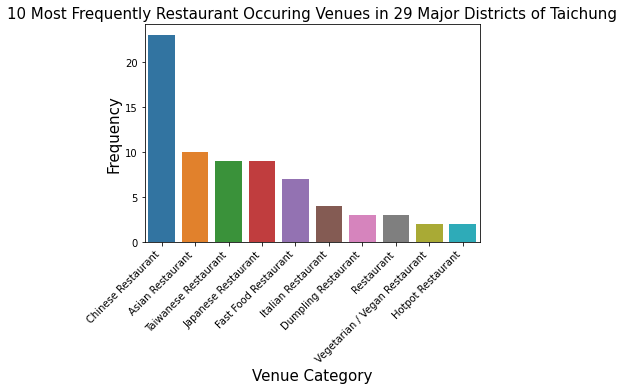

<Figure size 1296x504 with 0 Axes>

In [138]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue Category", y="Frequency", data=dist_venues_top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Restaurant Occuring Venues in 29 Major Districts of Taichung', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

### Number of venues in each Neighborhood

In [157]:
taichung_neighborhoods_top10 = taichung_venues['Neighborhood'].value_counts()[0:10].to_frame(name='frequency')
taichung_neighborhoods_top10 = taichung_neighborhoods_top10.reset_index()

taichung_neighborhoods_medium10 = taichung_venues['Neighborhood'].value_counts()[10:20].to_frame(name='frequency')
taichung_neighborhoods_medium10 = taichung_neighborhoods_medium10.reset_index()

taichung_neighborhoods_tail = taichung_venues['Neighborhood'].value_counts()[20:].to_frame(name='frequency')
taichung_neighborhoods_tail = taichung_neighborhoods_tail.reset_index()

#Taichung Venues Medium10
taichung_neighborhoods_medium10.rename(index=str, columns={"index": "Neighborhood", "frequency": "Frequency"}, inplace=True)
taichung_neighborhoods_medium10

#Taichung Venues Medium10
taichung_neighborhoods_tail.rename(index=str, columns={"index": "Neighborhood", "frequency": "Frequency"}, inplace=True)
taichung_neighborhoods_tail

#Taichung Venues Top10
taichung_neighborhoods_top10.rename(index=str, columns={"index": "Neighborhood", "frequency": "Frequency"}, inplace=True)
taichung_neighborhoods_top10

,Neighborhood,Frequency
0,West District,62
1,Central District,62
2,North District,31
3,Beitun District,16
4,East District,16
5,Xitun District,13
6,Houli District,11
7,Tanzi District,9
8,Fengyuan District,8
9,Dali District,7


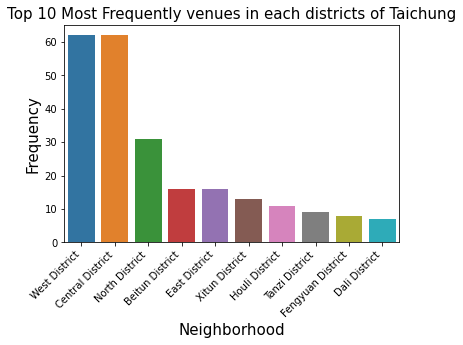

<Figure size 1296x504 with 0 Axes>

In [147]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Neighborhood", y="Frequency", data=taichung_neighborhoods_top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Top 10 Most Frequently venues in each districts of Taichung', fontsize=15)
plt.xlabel("Neighborhood", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [160]:
#print(taichung_neighborhoods_top10["Neighborhood"].tolist())
#print(taichung_neighborhoods_medium10["Neighborhood"].tolist())
#print(taichung_neighborhoods_tail["Neighborhood"].tolist())


# create map of Toronto using latitude and longitude values
map_taichung = folium.Map(location=[latitude, longitude], zoom_start=10)


# add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Name']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    if neighborhood in taichung_neighborhoods_top10["Neighborhood"].tolist():
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='red',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_taichung)
    else:
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_taichung)

    
map_taichung

## Layer of district density in Taichung city

In [161]:
print(taichung_neighborhoods_top10["Neighborhood"].tolist())

# create map of Toronto using latitude and longitude values
map_taichung = folium.Map(location=[latitude, longitude], zoom_start=10)


# add markers to map
for lat, lng, neighborhood, density in zip(df['Latitude'], df['Longitude'], df['Name'], df["Density"]):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    if density >= 4000 :
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='red',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_taichung)
    elif 4000 > density >= 1000:
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_taichung)
    else:
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='green',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_taichung)


    
map_taichung

['West District', 'Central District', 'North District', 'Beitun District', 'East District', 'Xitun District', 'Houli District', 'Tanzi District', 'Fengyuan District', 'Dali District']


In [162]:
taichung_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Beitun District,16,16,16,16,16,16
Central District,62,62,62,62,62,62
Da'an District,1,1,1,1,1,1
Dadu District,3,3,3,3,3,3
Dali District,7,7,7,7,7,7
Daya District,6,6,6,6,6,6
Dongshi District,5,5,5,5,5,5
East District,16,16,16,16,16,16
Fengyuan District,8,8,8,8,8,8


Find out how many unique categories can be curated from all the returned venues

In [163]:
print('There are {} uniques categories.'.format(len(taichung_venues['Venue Category'].unique())))

There are 96 uniques categories.


# Part3: Analyze Each Neighborhood

In [164]:
# one hot encoding
taichung_onehot = pd.get_dummies(taichung_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
taichung_onehot['Neighborhood'] = taichung_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [taichung_onehot.columns[-1]] + list(taichung_onehot.columns[:-1])
taichung_onehot = taichung_onehot[fixed_columns]

taichung_onehot.head()

,Neighborhood,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Garage,Auto Workshop,BBQ Joint,Bakery,...,Szechuan Restaurant,Taiwanese Restaurant,Tea Room,Trail,Train Station,Used Bookstore,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Yunnan Restaurant
0,Central District,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Central District,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Central District,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Central District,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Central District,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Examine the new dataframe size.

In [165]:
taichung_onehot.shape

(288, 97)

Next, group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [166]:
taichung_grouped = taichung_onehot.groupby('Neighborhood').mean().reset_index()
taichung_grouped

,Neighborhood,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Garage,Auto Workshop,BBQ Joint,Bakery,...,Szechuan Restaurant,Taiwanese Restaurant,Tea Room,Trail,Train Station,Used Bookstore,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Yunnan Restaurant
0,Beitun District,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.062500,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,Central District,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000,0.032258,...,0.000000,0.016129,0.032258,0.000000,0.016129,0.000000,0.016129,0.000000,0.0,0.000000
2,Da'an District,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,Dadu District,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,Dali District,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,Daya District,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
6,Dongshi District,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
7,East District,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,Fengyuan District,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,Heping District,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000


Confirm the new size

Let's print each neighborhood along with the top 5 most common venues

In [167]:
num_top_venues = 5

for hood in taichung_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = taichung_grouped[taichung_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Beitun District----
                venue  freq
0               Trail  0.25
1                Café  0.06
2           Gift Shop  0.06
3  Chinese Restaurant  0.06
4         Snack Place  0.06


----Central District----
                venue  freq
0               Hotel  0.10
1   Convenience Store  0.08
2  Chinese Restaurant  0.08
3        Dessert Shop  0.05
4         Coffee Shop  0.05


----Da'an District----
                 venue  freq
0           Smoke Shop   1.0
1  American Restaurant   0.0
2            Rock Club   0.0
3     Ramen Restaurant   0.0
4                 Pool   0.0


----Dadu District----
              venue  freq
0       Supermarket  0.33
1            Market  0.33
2      Gourmet Shop  0.33
3            Museum  0.00
4  Ramen Restaurant  0.00


----Dali District----
                  venue  freq
0            Art Museum  0.14
1   Japanese Restaurant  0.14
2  Fast Food Restaurant  0.14
3     Convenience Store  0.14
4    Chinese Restaurant  0.14


----Daya District----
      

Let's put that into a pandas dataframe

First, let's write a function to sort the venues in descending order.

In [168]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [169]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = taichung_grouped['Neighborhood']

for ind in np.arange(taichung_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(taichung_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beitun District,Trail,Restaurant,Snack Place,Gift Shop,Dessert Shop,Park,Pizza Place,Convenience Store,Chinese Restaurant,Café
1,Central District,Hotel,Convenience Store,Chinese Restaurant,Dessert Shop,Coffee Shop,Snack Place,Ice Cream Shop,Tea Room,Asian Restaurant,Japanese Restaurant
2,Da'an District,Smoke Shop,Yunnan Restaurant,Cupcake Shop,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Fast Food Restaurant
3,Dadu District,Gourmet Shop,Market,Supermarket,Yunnan Restaurant,Food Truck,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Donut Shop
4,Dali District,Food Truck,Convenience Store,Art Museum,Japanese Restaurant,Hakka Restaurant,Chinese Restaurant,Fast Food Restaurant,Yunnan Restaurant,Diner,Dive Bar


# Part4: Cluster Neighborhoods

Run k-means to cluster the neighborhood into 5 clusters.

In [170]:
# set number of clusters
kclusters = 5

taichung_grouped_clustering = taichung_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(taichung_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 2, 0, 0, 0, 4, 0, 0, 1])

Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [171]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

taichung_merged = df

taichung_merged.rename(columns={'Name':'Neighborhood'}, inplace=True)

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
taichung_merged = taichung_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

taichung_merged = taichung_merged.dropna()

taichung_merged.head() # check the last columns!

,Chinese Name,Area,Population,Density,Postal Code,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,中區,0.8803,18173.0,20644.0,400.0,Central District,24.141686,120.680598,0.0,Hotel,Convenience Store,Chinese Restaurant,Dessert Shop,Coffee Shop,Snack Place,Ice Cream Shop,Tea Room,Asian Restaurant,Japanese Restaurant
1,東區,9.2855,75769.0,8160.0,401.0,East District,24.137332,120.697086,0.0,Market,Chinese Restaurant,Shopping Mall,Bookstore,Coffee Shop,Museum,Shopping Plaza,Movie Theater,Food Court,Karaoke Bar
2,南區,6.8101,126585.0,18588.0,402.0,South District,24.121141,120.664618,0.0,Coffee Shop,Train Station,Tea Room,Skating Rink,Burger Joint,Fast Food Restaurant,Food Court,Dessert Shop,Dim Sum Restaurant,Diner
3,西區,5.7042,114618.0,20094.0,403.0,West District,24.143911,120.664758,0.0,Café,Dessert Shop,Tea Room,Chinese Restaurant,Italian Restaurant,Asian Restaurant,Plaza,Coffee Shop,American Restaurant,Ice Cream Shop
4,北區,6.9376,146676.0,21142.0,404.0,North District,24.158640,120.680952,0.0,Coffee Shop,Hotpot Restaurant,Hotel,Japanese Restaurant,Diner,Taiwanese Restaurant,Chinese Restaurant,Café,Bus Station,Juice Bar


Finally, let's visualize the resulting clusters

In [172]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(taichung_merged['Latitude'], taichung_merged['Longitude'], taichung_merged['Neighborhood'], taichung_merged['Cluster Labels']):
    cluster = int(cluster)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Part5: Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. 

Cluster 1

In [173]:
taichung_merged.loc[taichung_merged['Cluster Labels'] == 0, taichung_merged.columns[[1] + list(range(5, taichung_merged.shape[1]))]]

,Area,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0.8803,Central District,24.141686,120.680598,0.0,Hotel,Convenience Store,Chinese Restaurant,Dessert Shop,Coffee Shop,Snack Place,Ice Cream Shop,Tea Room,Asian Restaurant,Japanese Restaurant
1,9.2855,East District,24.137332,120.697086,0.0,Market,Chinese Restaurant,Shopping Mall,Bookstore,Coffee Shop,Museum,Shopping Plaza,Movie Theater,Food Court,Karaoke Bar
2,6.8101,South District,24.121141,120.664618,0.0,Coffee Shop,Train Station,Tea Room,Skating Rink,Burger Joint,Fast Food Restaurant,Food Court,Dessert Shop,Dim Sum Restaurant,Diner
3,5.7042,West District,24.143911,120.664758,0.0,Café,Dessert Shop,Tea Room,Chinese Restaurant,Italian Restaurant,Asian Restaurant,Plaza,Coffee Shop,American Restaurant,Ice Cream Shop
4,6.9376,North District,24.158640,120.680952,0.0,Coffee Shop,Hotpot Restaurant,Hotel,Japanese Restaurant,Diner,Taiwanese Restaurant,Chinese Restaurant,Café,Bus Station,Juice Bar
5,62.7034,Beitun District,24.184003,120.736232,0.0,Trail,Restaurant,Snack Place,Gift Shop,Dessert Shop,Park,Pizza Place,Convenience Store,Chinese Restaurant,Café
9,28.8759,Dali District,24.095757,120.692626,0.0,Food Truck,Convenience Store,Art Museum,Japanese Restaurant,Hakka Restaurant,Chinese Restaurant,Fast Food Restaurant,Yunnan Restaurant,Diner,Dive Bar
12,41.1845,Fengyuan District,24.249903,120.737572,0.0,Japanese Restaurant,Italian Restaurant,Taiwanese Restaurant,Supermarket,Fried Chicken Joint,Mountain,Bubble Tea Shop,Yunnan Restaurant,Food Court,Dim Sum Restaurant
14,18.2105,Shigang District,24.264933,120.790382,0.0,Dessert Shop,Park,Café,Garden,Taiwanese Restaurant,Noodle House,Food & Drink Shop,Dim Sum Restaurant,Diner,Dive Bar
18,25.8497,Tanzi District,24.211711,120.710997,0.0,Convenience Store,Historic Site,Japanese Restaurant,Auto Workshop,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Bus Station,Yunnan Restaurant,Food Court


Cluster 2

In [174]:
taichung_merged.loc[taichung_merged['Cluster Labels'] == 1, taichung_merged.columns[[1] + list(range(5, taichung_merged.shape[1]))]]

,Area,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,1037.8192,Heping District,24.276203,121.140185,1.0,Water Park,Yunnan Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Fast Food Restaurant,Food & Drink Shop


Cluster 3

In [175]:
taichung_merged.loc[taichung_merged['Cluster Labels'] == 2, taichung_merged.columns[[1] + list(range(5, taichung_merged.shape[1]))]]

,Area,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,27.4045,Da'an District,24.365096,120.591441,2.0,Smoke Shop,Yunnan Restaurant,Cupcake Shop,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Fast Food Restaurant


Cluster 4

In [176]:
taichung_merged.loc[taichung_merged['Cluster Labels'] == 3, taichung_merged.columns[[1] + list(range(5, taichung_merged.shape[1]))]]

,Area,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,39.8467,Xitun District,24.183089,120.627013,3.0,Hotel,Taiwanese Restaurant,Gym / Fitness Center,Japanese Restaurant,Furniture / Home Store,Fast Food Restaurant,Cantonese Restaurant,Yunnan Restaurant,Tea Room,Convenience Store
17,68.8874,Xinshe District,24.177693,120.831323,3.0,Hotel,Café,Department Store,Dim Sum Restaurant,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Fast Food Restaurant,Food & Drink Shop


Cluster 5

In [177]:
taichung_merged.loc[taichung_merged['Cluster Labels'] == 4, taichung_merged.columns[[1] + list(range(5, taichung_merged.shape[1]))]]

,Area,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,31.2578,Nantun District,24.141655,120.617738,4.0,Vegetarian / Vegan Restaurant,Chinese Restaurant,Asian Restaurant,Seafood Restaurant,Shopping Mall,Yunnan Restaurant,Food & Drink Shop,Dessert Shop,Dim Sum Restaurant,Diner
13,58.9439,Houli District,24.309625,120.714613,4.0,Chinese Restaurant,Restaurant,Asian Restaurant,Jazz Club,Juice Bar,Dumpling Restaurant,Breakfast Spot,Buffet,Yunnan Restaurant,Food Truck
15,117.4065,Dongshi District,24.249526,120.840140,4.0,Chinese Restaurant,Shoe Store,Taiwanese Restaurant,Dumpling Restaurant,Mountain,Yunnan Restaurant,Food Court,Dessert Shop,Dim Sum Restaurant,Diner
22,40.4604,Shalu District,24.234252,120.583863,4.0,Breakfast Spot,Chinese Restaurant,French Restaurant,Dim Sum Restaurant,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Fast Food Restaurant,Food & Drink Shop


# Part6: Conclusion and Summary

Clusters 1 and 4 have the most number of neighbourhoods, cluster 2, 3 and 5 has only one, three and one and one neighbourhoods each respectively